# Desafio Hiperstream

Para começar o desenvolvimento do código primeiramente realizamos os imports necessários para o desenvolvimento da solução do desafio

In [8]:
import pandas as pd
import networkx as nx

Com auxílio da biblioteca Pandas, realizamos a leitura do csv e já transformamos num data frame

In [9]:
df = pd.read_csv("Baseparateste.csv", sep=";")

In [10]:
print (df)

      ID                                               Nome  \
0   3036                                 Cliente-FATURA-HSJ   
1   3037                           Cliente-FATURA-WFD-EMAIL   
2   3038                 Cliente-FATURA-WFD-EMAIL-ALEATORIO   
3   3039                   Cliente-FATURA-WFD-ARMAZENAMENTO   
4   3040          Cliente-FATURA-WFD-ARMAZENAMNTO-ALEATORIO   
5   3041                     Cliente-FATURA-QUEBRAPDF-EMAIL   
6   3042             Cliente-FATURA-QUEBRAPDF-ARMAZENAMENTO   
7   3043                 Cliente-FATURA-ACTION-EMAIL 1a VIA   
8   3044                    Cliente-FATURA-INPUBLOG-DIGITAL   
9   3045                    Cliente-FATURA-CARGAECM-DIGITAL   
10  3046                Cliente-FATURA-DPREPORT-FIMPROCESSO   
11  3048              Cliente-FATURA-WFD-IMPRESSO-ALEATORIO   
12  3049                            Cliente-FATURA-WFD-IEEN   
13  3050                    Cliente-FATURA-WFD-IMPRESSO-ECM   
14  3051                  Cliente-FATURA-MOVERSPOOL-GRA

Para primeira parte da resolução lógica do problema, verificamos quais IDs/Nomes estão ligados a quais Pasta de Origem, visto que para uma mesma Pasta de Origem é possível diversos valores IDs/Nomes diferentes. Sendo assim geramos um dicionário "adj" contendo todas entradas

In [11]:
adj={}
for i in range (len(df)):
    pastaorigem = df["PastaOrigem"][i]
    nome = df["Nome"][i]
    if pastaorigem not in adj:
        adj[pastaorigem] = [nome]
    else:
        adj[pastaorigem].append(nome)
print (adj)

{'E:\\PRODUCAO\\Cliente\\FATURA\\HSJ\\ENTRADA\\': ['Cliente-FATURA-HSJ'], 'E:\\PRODUCAO\\Cliente\\FATURA\\FORMATAR_FATURA\\PRINTNET\\ENTRADA\\': ['Cliente-FATURA-WFD-EMAIL', 'Cliente-FATURA-WFD-EMAIL-ALEATORIO', 'Cliente-FATURA-WFD-ARMAZENAMENTO', 'Cliente-FATURA-WFD-ARMAZENAMNTO-ALEATORIO', 'Cliente-FATURA-WFD-IMPRESSO-ALEATORIO', 'Cliente-FATURA-MOVERSPOOL-ARQ.-EXCLUSAO'], 'E:\\PRODUCAO\\Cliente\\FATURA\\SAIDAS\\PDF_UNICO\\': ['Cliente-FATURA-QUEBRAPDF-EMAIL', 'Cliente-FATURA-QUEBRAPDF-ARMAZENAMENTO', 'Cliente-FATURA-QUEBRAPDF-IMPRESSO'], 'E:\\PRODUCAO\\Cliente\\FATURA\\ACTION\\ENTRADA\\': ['Cliente-FATURA-ACTION-EMAIL 1a VIA', 'Cliente-FATURA-ACTION-EMAIL 2a VIA'], 'E:\\PRODUCAO\\Cliente\\FATURA\\INPUTBLOG\\': ['Cliente-FATURA-INPUBLOG-DIGITAL'], 'E:\\PRODUCAO\\Cliente\\FATURA\\CARGA_ECM\\': ['Cliente-FATURA-CARGAECM-DIGITAL'], 'E:\\PRODUCAO\\Cliente\\FATURA\\DPREPORT\\DPR_FIM_PROCESSAMENTO\\': ['Cliente-FATURA-DPREPORT-FIMPROCESSO'], 'E:\\PRODUCAO\\Cliente\\FATURA\\FORMATAR_FATURA\

Com essa informação dos {Pasta Destino : [IDs/Nomes]} em mãos, adicionamos uma condição a fim de verificar quais valores de Pasta Destino e Pasta Backup estão em "adj", gerando os edges

In [12]:
G = nx.MultiDiGraph()

for i in range (len(df)):
    destinos = []
    nome = df["Nome"][i]
    pastadestino = df["PastaDestino"][i]
    pastabackup = df["PastaBackup"][i]
    if pastadestino in adj:
        destinos.extend(adj[pastadestino])
    if pastabackup in adj:
        destinos.extend(adj[pastabackup])
    for destino in destinos:
        G.add_edge(nome , destino)

Nessa célula, diferente da Solucao.ipynb, setamos o pos com o layout do graphviz, então a biblioteca do netoworkx pega as funções da biblioteca da graphviz e se utiliza para gerar o posicionamento dos nós na plotagem do gráfico

{'Cliente-FATURA-WFD-EMAIL': Text(168.36, 293.9, 'Cliente-FATURA-WFD-EMAIL'),
 'Cliente-FATURA-ACTION-EMAIL 1a VIA': Text(234.5, 267.54, 'Cliente-FATURA-ACTION-EMAIL 1a VIA'),
 'Cliente-FATURA-ACTION-EMAIL 2a VIA': Text(241.83, 245.16, 'Cliente-FATURA-ACTION-EMAIL 2a VIA'),
 'Cliente-FATURA-WFD-EMAIL-ALEATORIO': Text(752.73, 48.119, 'Cliente-FATURA-WFD-EMAIL-ALEATORIO'),
 'Cliente-FATURA-INPUBLOG-DIGITAL': Text(826.15, 70.56, 'Cliente-FATURA-INPUBLOG-DIGITAL'),
 'Cliente-FATURA-WFD-ARMAZENAMENTO': Text(362.74, 344.84, 'Cliente-FATURA-WFD-ARMAZENAMENTO'),
 'Cliente-FATURA-CARGAECM-DIGITAL': Text(314.88, 288.79, 'Cliente-FATURA-CARGAECM-DIGITAL'),
 'Cliente-FATURA-WFD-ARMAZENAMNTO-ALEATORIO': Text(882.12, 18.0, 'Cliente-FATURA-WFD-ARMAZENAMNTO-ALEATORIO'),
 'Cliente-FATURA-QUEBRAPDF-EMAIL': Text(164.68, 226.42, 'Cliente-FATURA-QUEBRAPDF-EMAIL'),
 'Cliente-FATURA-QUEBRAPDF-ARMAZENAMENTO': Text(393.14, 253.81, 'Cliente-FATURA-QUEBRAPDF-ARMAZENAMENTO'),
 'Cliente-FATURA-DPREPORT-FIMPROCESSO

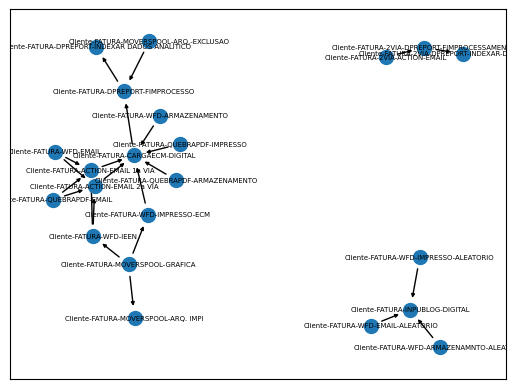

In [14]:
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G,pos, arrows=True, arrowsize=5 ) 
nx.draw_networkx_labels(G,pos, font_size=5)